In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from astropy.table import Table
from astropy.io import fits
from astropy.visualization import LogStretch, ManualInterval, ZScaleInterval, ImageNormalize, PowerStretch, AsinhStretch
from mpl_toolkits.axes_grid1 import make_axes_locatable
import KnotFit as kf

In /home/brian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/brian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/brian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/brian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/brian/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
indir = 'whl0137'
imfile = 'hlsp_relics_hst_wfc3ir-60mas_whl0137-08_f110w_drz.fits' 

modeldir = 'whl0137/lens_modelling/zitrin/TosendBrianWithMinimization'#/models/imv2_4free/1000step'#/res1'
dflx = os.path.join(modeldir, 'alpha_x_whl0137_6p2_20210112_LTM_Gc.fits')
dfly = os.path.join(modeldir, 'alpha_y_whl0137_6p2_20210112_LTM_Gc.fits')
#dflx = os.path.join(modeldir, 'alpha_x_whl0137_2p_20200609_LTM_Gc.fits')
#dfly = os.path.join(modeldir, 'alpha_y_whl0137_2p_20200609_LTM_Gc.fits')


imfile = os.path.join(indir,imfile)

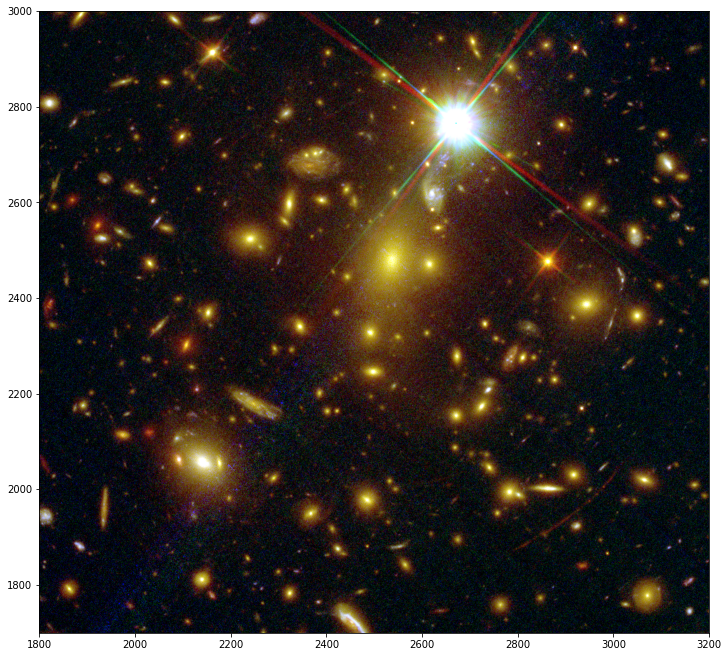

In [3]:
Image.MAX_IMAGE_PIXELS = None
infile = 'whl0137-08_new_bright.png'
#infile = 'macs0308+26.png'
#infile = 'spt0615-57.png'
infile = os.path.join(indir, infile)
im = Image.open(infile)
im = im.transpose(Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(12, 12.5))
plt.imshow(im, origin='lower')
xlo, xhi = 1800, 3200
ylo, yhi = 1700, 3000
plt.xlim(xlo, xhi)
plt.ylim(ylo, yhi)

plt.show()

In [4]:
# read and reproject lens model deflection maps. This takes a while. 

ax, ay, imdataHST = kf.initDeflection_Image(imfile, dflx, dfly, 
                                            zlens=0.566, zsource_in=6.2, zsource_out=6.2)
                                            #zlens=0.356, zsource_in=0, zsource_out=6.3) 
                                            #zlens=0.972, zsource_in=0, zsource_out=9.88)

ax *= 0.06
ay *= 0.06 #pixels to arcsec
magnifinv = kf.makeMagnificationMap(ax, ay)

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [5]:
# Define coordinate grid
yy, xx = np.indices(magnifinv.shape)

In [6]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
np.delete(x,np.s_[:3])

array([ 4,  5,  6,  7,  8,  9, 10])

In [7]:
# load in multiple image positions
multfile = os.path.join(indir, 'lens_modelling/zitrin/TosendBrianWithMinimization/imagesv2.txt')
mult_images = Table.read(multfile, format='ascii')

im_x = mult_images['col1']
im_y = mult_images['col2']

num_images = 5

n_per_system = mult_images['col4']
im_id = []
for i in range(num_images):
    n_sys = n_per_system[0]
    im_id.append(["{sys}.{im}".format(sys=i+1,im=x) for x in range(1,n_sys+1)])
    np.delete(n_per_system, np.s_[:n_sys])

im_id = np.array(im_id).flatten()

In [8]:
# load cluster member positions and select optimized members
membfile = os.path.join(indir, 'lens_modelling/zitrin/TosendBrianWithMinimization/galaxiesfile.txt')
members = Table.read(membfile, format='ascii')

mem_x = members['col2']
mem_y = members['col3']

ind_free_gal = [1, 2, 79, 83] # from run_CLASH25_model_and_errors matlab file
ind_free_gal = [i-1 for i in ind_free_gal]

free_x = mem_x[ind_free_gal]
free_y = mem_y[ind_free_gal]
print(free_x,free_y)

  col2  
--------
2539.017
2864.579
2945.141
3050.516   col3  
--------
2478.594
 2003.25
2387.696
2363.638


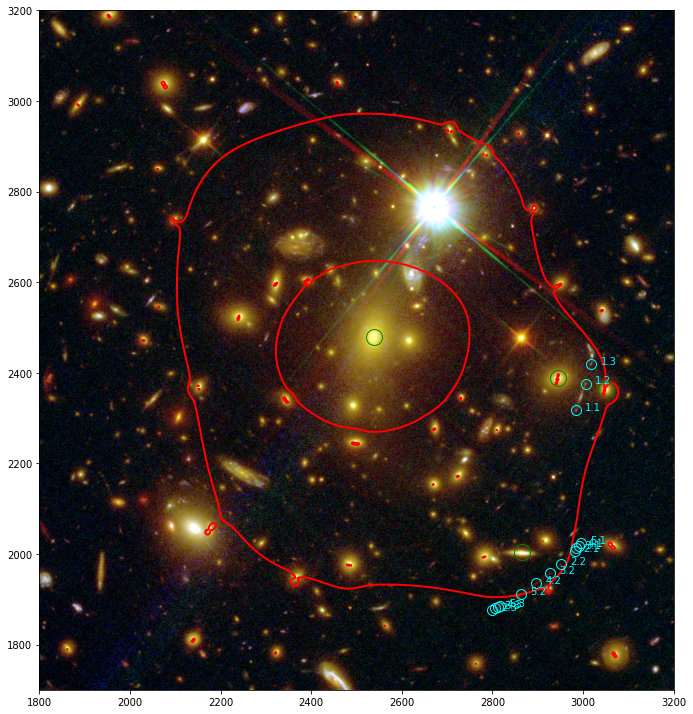

In [9]:
plt.figure(figsize=(12, 12.5))

plt.imshow(im, origin='lower')

xlo, xhi = 1800, 3200
ylo, yhi = 1700, 3200
plt.xlim(xlo, xhi)
plt.ylim(ylo, yhi)

# draw z = 6.2 critical curve on image
con = plt.contour(xx, yy, magnifinv, [0], colors='r', linewidths=2)

# draw z = 3.1 critical curve on image (different color)
#con2 = plt.contour(xx, yy, magnifinv31, [0], colors='y', linewidths=2)

# highlight input multiple images
plt.plot(im_x, im_y, marker='o', ms=10, mec='cyan', mfc='None', linestyle='None')
for i in range(len(im_id)):
    plt.text(im_x[i]+20, im_y[i], im_id[i], color='cyan')

# highlight cluster members allowed to vary
plt.plot(free_x, free_y, marker='o', ms=16, mec='green', mfc='None', linestyle='None')

plt.show()

In [10]:
# Source position grid
xss = xx - ax
yss = yy - ay

# define knot positions 

x, y = 2951, 1976 # lower knot whl0137

x2, y2 = 2897, 1935 # middle arc diffuse bit

xs = x - ax[y, x]
ys = y - ay[y, x]
print(xs, ys)
xs2 = x2 - ax[y2, x2]
ys2 = y2 - ay[y2, x2]
print(xs2, ys2)

# create coordinate grid

xlo, xhi = 2650, 3100 #whl0137
ylo, yhi = 1800, 2100

# to further limit the field of view around a single knot
#delta = 5 
#xlo, xhi = x - delta, x + delta 
#ylo, yhi = y - delta, y + delta 


xx_crop = xx[ylo:yhi,xlo:xhi]
yy_crop = yy[ylo:yhi,xlo:xhi]

ax_crop = ax[ylo:yhi,xlo:xhi]
ay_crop = ay[ylo:yhi,xlo:xhi]

xss_crop = xss[ylo:yhi,xlo:xhi]
yss_crop = yss[ylo:yhi,xlo:xhi]

2453.4773473525024 2427.1567901356866
2456.7151917957585 2424.024526029083


In [ ]:
# for high-resolution grid 
# skip if using lower resolution
# high resolution tends to crash when using too large a field of view

resolution = 0.01 # pixels
x_hires = np.arange(xlo, xhi, resolution)
y_hires = np.arange(ylo, yhi, resolution)
xx_hires, yy_hires = np.meshgrid(x_hires, y_hires)

ax_hires = interp2d(xx_crop, yy_crop, ax_crop)(x_hires, y_hires)
ay_hires = interp2d(xx_crop, yy_crop, ay_crop)(x_hires, y_hires)

xss_hires = xx_hires - ax_hires
yss_hires = yy_hires - ay_hires

In [11]:
# create argdict for fitting

imstamp = imdataHST[ylo:yhi, xlo:xhi]

star = kf.starGen(imdataHST, starLoc=(2232, 1622)) #whl

In [ ]:
# define sigma to use for fitting. Not needed for plotting

rmsfile = 'hlsp_relics_hst_wfc3ir-60mas_whl0137-08_f110w_rms.fits'

rmsfile = os.path.join(indir, rmsfile)
rmsfo = fits.open(rmsfile)
rms = rmsfo[0].data

rmscut = rms[ylo:yhi, xlo:xhi]

exp_time = 5123.501098 #whl0137

sigma = kf.poisson(imstamp, t_expose=exp_time)
sigma += rmscut

In [12]:
argdict = {
    "xs" : xs,
    "ys" : ys,
    "xs2" : xs2,
    "ys2" : ys2,
#    "xss" : xss_hires,
#    "yss" : yss_hires,
    "xss" : xss_crop,
    "yss" : yss_crop,
    "star" : star,
    "sigma" : sigma,
    "arcIm" : imstamp
}

In [17]:
# define arc parameters. Right now done by hand for visualization purposes
theta = [1.9, 0.02, 1.9, 0.2]
print(theta)

# create relensed arc
cv = kf.convolved(theta,**argdict)
arcimage = np.copy(argdict["arcIm"])

simimage = np.zeros_like(arcimage)
xoffset = 20
arcimage[:,xoffset:] += cv[:,:-xoffset]
simimage[:,:] += cv[:,:]


[5.9, 0.02, 1.9, 0.2]


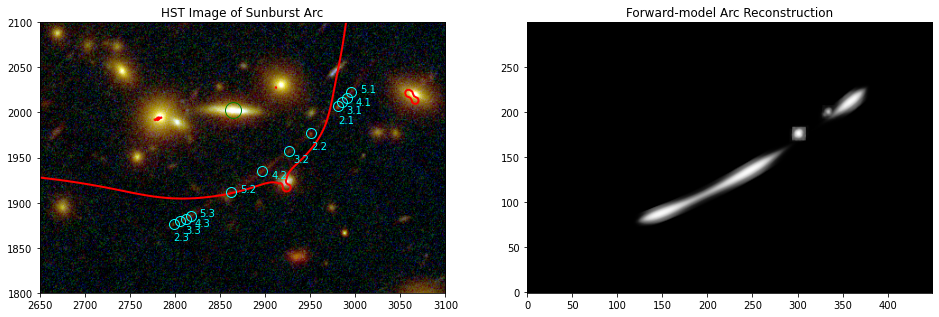

In [19]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16,6))

ax1.imshow(im, origin='lower')

xlo, xhi = 2650, 3100 #whl0137
ylo, yhi = 1800, 2100
ax1.set_xlim(xlo, xhi)
ax1.set_ylim(ylo, yhi)

ax1.set_title('HST Image of Sunburst Arc')

# draw z = 6.2 critical curve on image
con = ax1.contour(xx, yy, magnifinv, [0], colors='r', linewidths=2)

# mark input images
ax1.plot(im_x, im_y, marker='o', ms=10, mec='cyan', mfc='None', linestyle='None')
for i in range(3,len(im_id)):
    if im_id[i].startswith('2'):
        delta_x = 0
        delta_y = -18
    elif im_id[i].startswith('3'):
        delta_x = 5
        delta_y = -13
    elif im_id[i].startswith('4'):
        delta_x = 10
        delta_y = -8
    elif im_id[i].startswith('5'):
        delta_x = 10
        delta_y = 0
    ax1.text(im_x[i]+delta_x, im_y[i]+delta_y, im_id[i], color='cyan')

# mark galaxies allowed to float
ax1.plot(free_x, free_y, marker='o', ms=16, mec='green', mfc='None', linestyle='None')


# show relensed arc reproduction on separate axes
norm2 = ImageNormalize(stretch=LogStretch())

im2 = ax2.imshow(simimage, origin='lower', cmap='Greys_r', norm=norm2)#, vmin=-0.001, vmax=0.05)##)

div2 = make_axes_locatable(ax2)
#cax2 = div2.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(im2, cax=cax2, orientation='vertical')
ax2.set_title('Forward-model Arc Reconstruction')

# turn off axis ticks
#ax1.get_xaxis().set_visible(False)
#ax1.get_yaxis().set_visible(False)
#ax2.get_xaxis().set_visible(False)
#ax2.get_yaxis().set_visible(False)

plt.savefig('whl0137/lens_modelling/zitrin/TosendBrianWithMinimization/models/sys5_parity/full_labeled.png')
plt.show()

In [ ]:
'''
To-do tomorrow:
Clean up free galaxy labels - ellipses?
Figure out how to add F110W on top of color image, like Dan's images (GIMP)
'''